# FINAL PROJECT

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv ('hair_loss.csv')
df

,total_protein,total_keratine,hair_texture,vitamin,manganese,iron,calcium,body_water_content,stress_level,liver_data,hair_fall
0,312,100,14,249,87,55,333,44,41,368,4
1,52,207,3,425,387,1,182,26,65,41,1
2,170,197,11,140,199,91,414,30,54,90,4
3,256,334,19,358,120,3,35,48,45,65,2
4,309,185,58,207,329,301,345,23,90,346,4
...,...,...,...,...,...,...,...,...,...,...,...
99995,440,20,63,209,473,260,12,86,7,281,5
99996,311,233,37,352,194,159,391,57,76,30,5
99997,27,210,10,185,376,278,96,40,49,110,3
99998,450,18,35,250,287,157,81,31,2,156,1


#### ALMIGHTY CLEANING

In [3]:
nan_values = df.isna().sum()
null_values = df.isnull().sum()
print("NaN Values:")
print(nan_values)

print("\nNull Values:")
print(null_values)

NaN Values:
total_protein         0
total_keratine        0
hair_texture          0
vitamin               0
manganese             0
iron                  0
calcium               0
body_water_content    0
stress_level          0
liver_data            0
hair_fall             0
dtype: int64

Null Values:
total_protein         0
total_keratine        0
hair_texture          0
vitamin               0
manganese             0
iron                  0
calcium               0
body_water_content    0
stress_level          0
liver_data            0
hair_fall             0
dtype: int64


In [4]:
# Remove duplicates and update the DataFrame
df.drop_duplicates(inplace=True)

##### SPLITTING CATEGORICAL AND NUMERICAL

In [5]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_data = df[categorical_columns]
display(categorical_columns)

[]

In [6]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
numerical_data = df[numerical_columns]
display(numerical_columns)

['total_protein',
 'total_keratine',
 'hair_texture',
 'vitamin',
 'manganese',
 'iron',
 'calcium',
 'body_water_content',
 'stress_level',
 'liver_data',
 'hair_fall']

#### WRANGLING

In [7]:
# Loop through each column and display unique values
for column in df.columns:
    unique_values = df[column].unique()
    #print(f"Unique values in '{column}': {unique_values}")

In [8]:
# Display data types of each column
data_types = df.dtypes
print(data_types)

total_protein         int64
total_keratine        int64
hair_texture          int64
vitamin               int64
manganese             int64
iron                  int64
calcium               int64
body_water_content    int64
stress_level          int64
liver_data            int64
hair_fall             int64
dtype: object


#### EDA

In [9]:
print(df.head())

   total_protein  total_keratine  hair_texture  vitamin  manganese  iron  \
0            312             100            14      249         87    55   
1             52             207             3      425        387     1   
2            170             197            11      140        199    91   
3            256             334            19      358        120     3   
4            309             185            58      207        329   301   

   calcium  body_water_content  stress_level  liver_data  hair_fall  
0      333                  44            41         368          4  
1      182                  26            65          41          1  
2      414                  30            54          90          4  
3       35                  48            45          65          2  
4      345                  23            90         346          4  


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   total_protein       100000 non-null  int64
 1   total_keratine      100000 non-null  int64
 2   hair_texture        100000 non-null  int64
 3   vitamin             100000 non-null  int64
 4   manganese           100000 non-null  int64
 5   iron                100000 non-null  int64
 6   calcium             100000 non-null  int64
 7   body_water_content  100000 non-null  int64
 8   stress_level        100000 non-null  int64
 9   liver_data          100000 non-null  int64
 10  hair_fall           100000 non-null  int64
dtypes: int64(11)
memory usage: 8.4 MB
None


In [11]:
df.shape

(100000, 11)

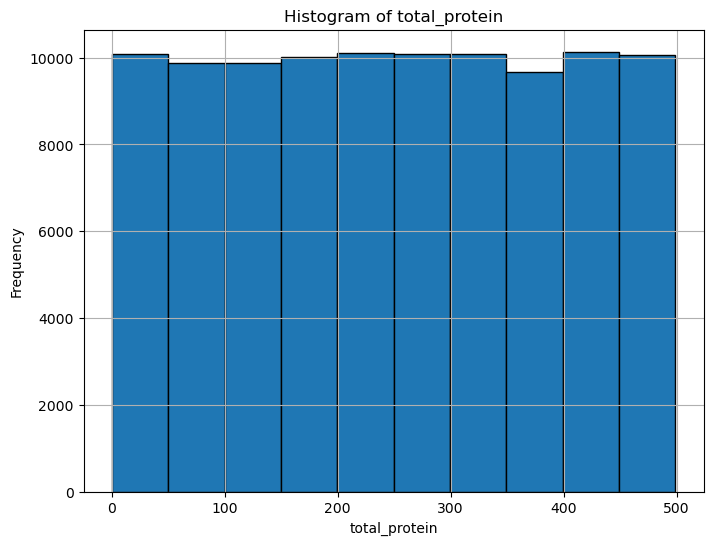

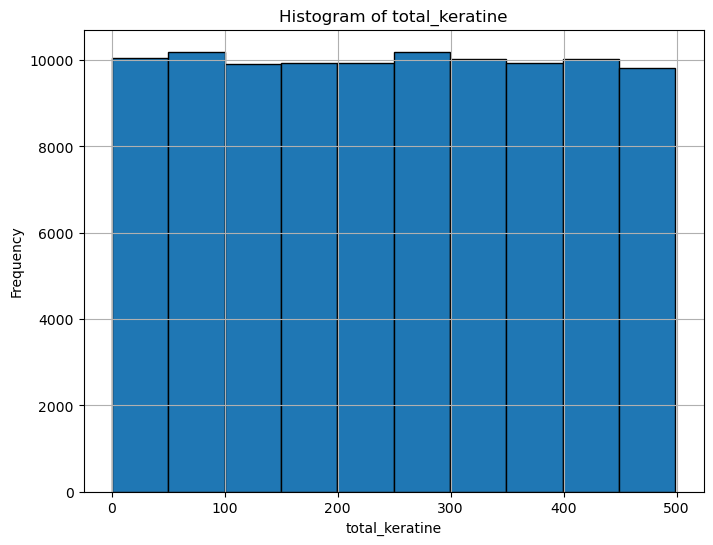

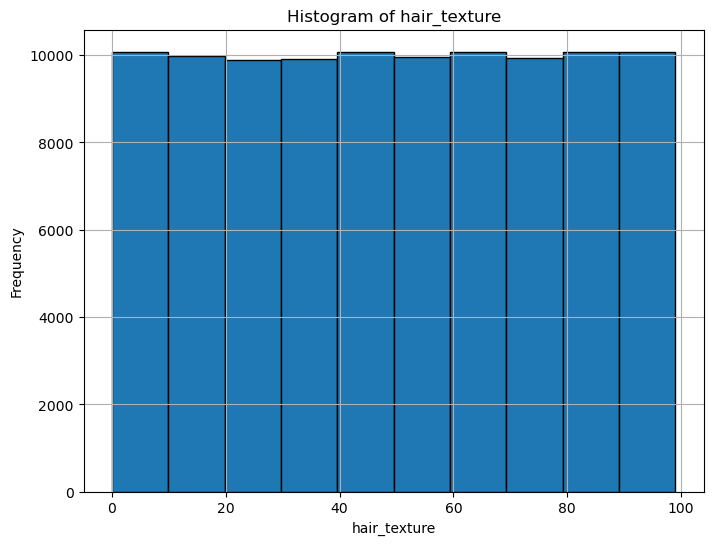

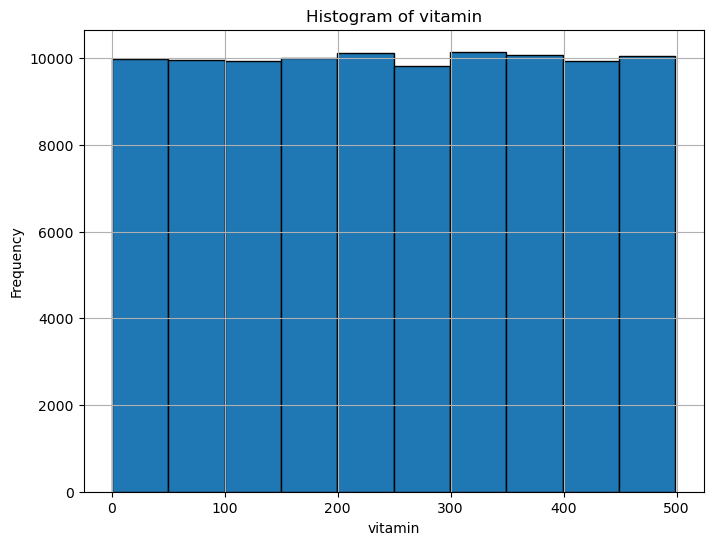

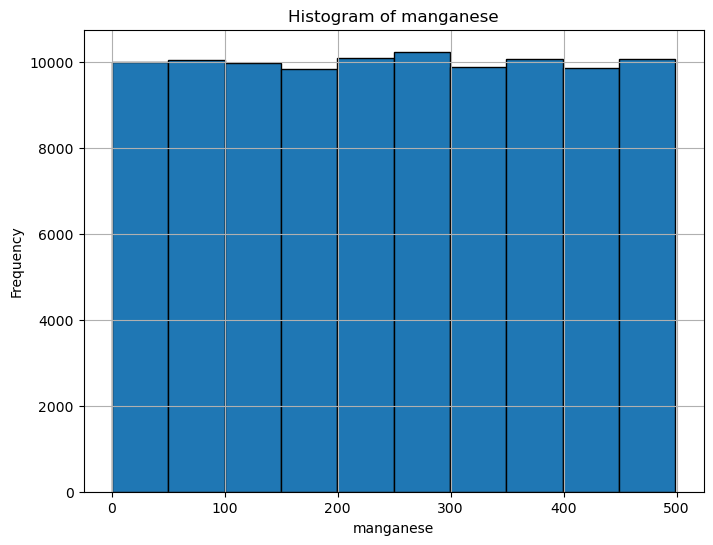

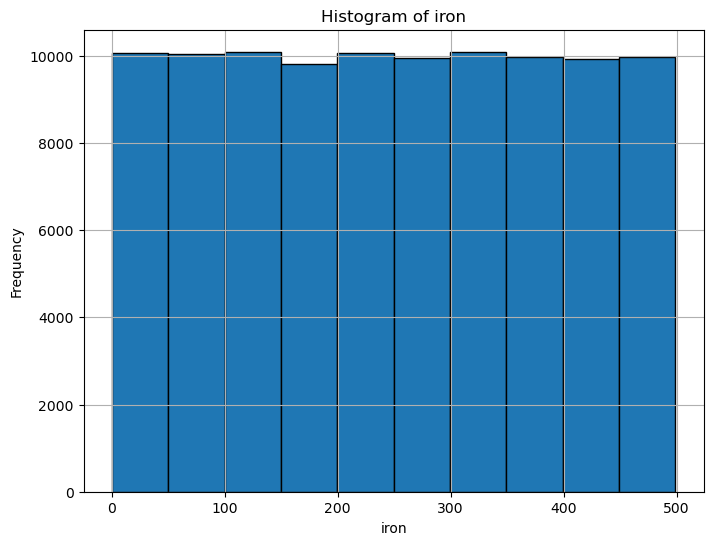

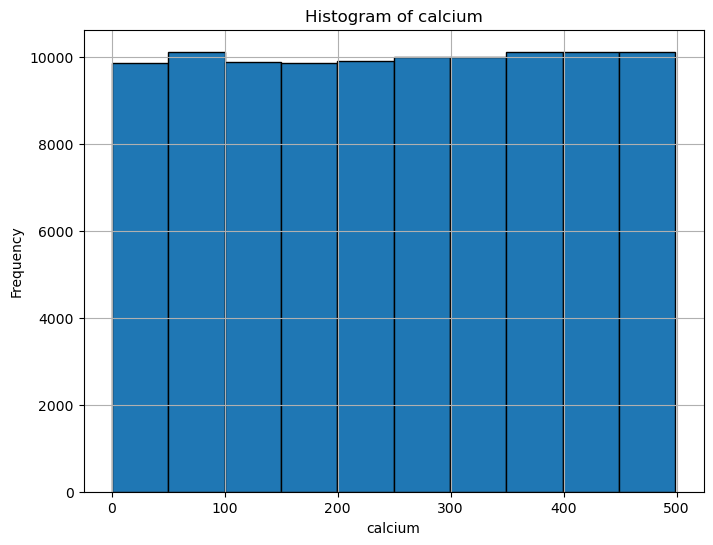

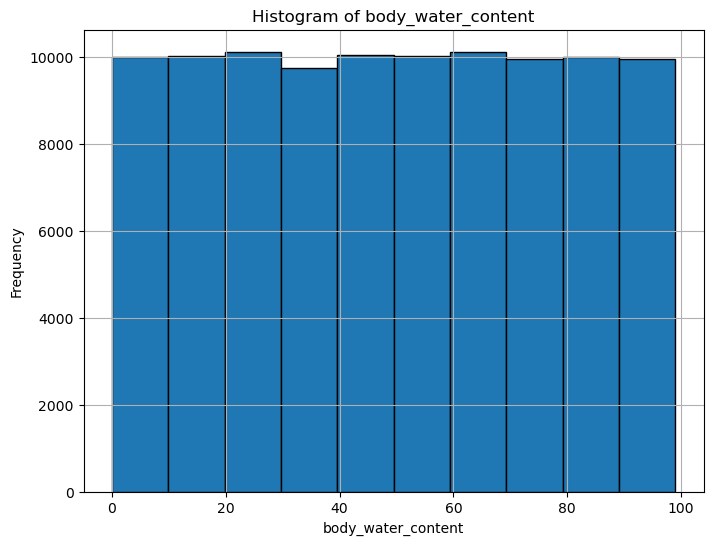

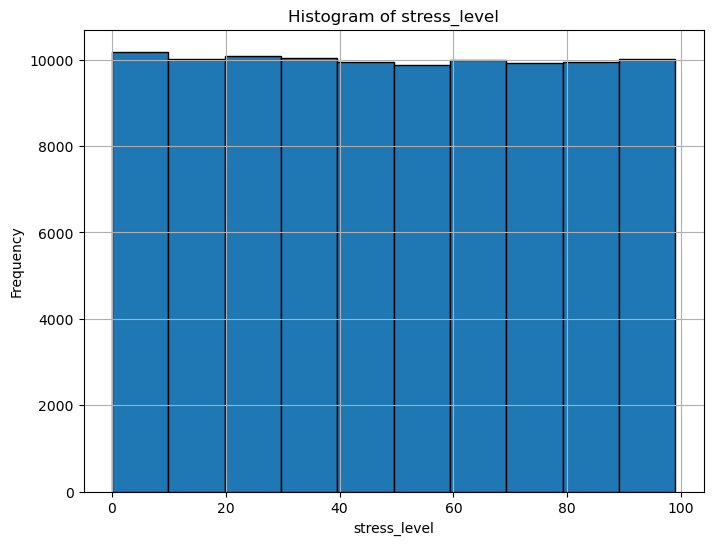

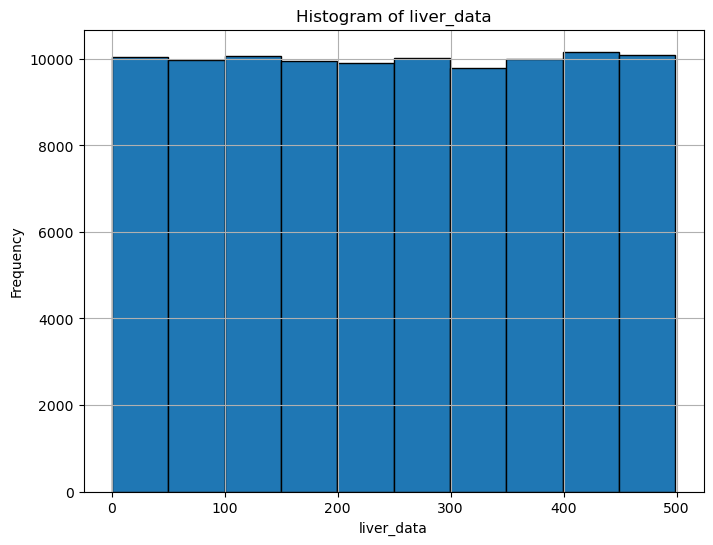

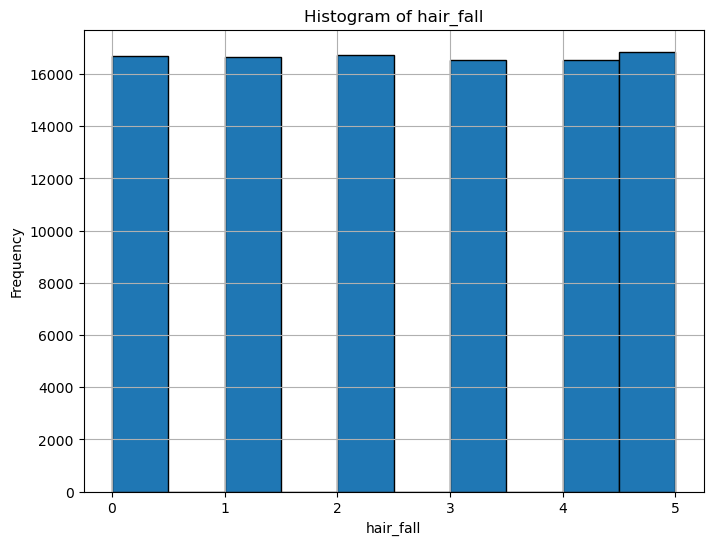

In [29]:
import matplotlib.pyplot as plt 
import seaborn as sns
numeric_df = df.select_dtypes(include=['number'])

# Plot histograms for each numerical column
for column in numeric_df.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [25]:
numeric_df = df.select_dtypes(include=['number'])

# Calculate the IQR for each numerical column
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Detect potential outliers using IQR method
potential_outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))
outliers_count = potential_outliers.sum()

print("Columns with potential outliers and their counts:")
print(outliers_count)

Columns with potential outliers and their counts:
total_protein         0
total_keratine        0
hair_texture          0
vitamin               0
manganese             0
iron                  0
calcium               0
body_water_content    0
stress_level          0
liver_data            0
hair_fall             0
dtype: int64


C:\Users\Lenovo X220 i7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo X220 i7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


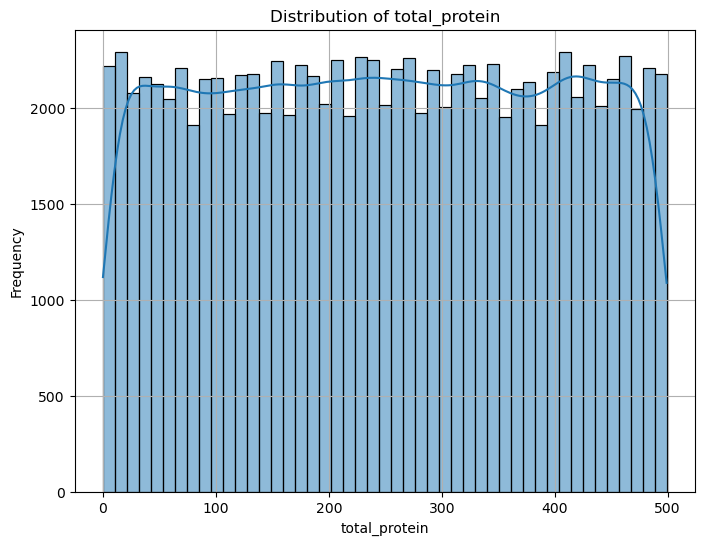

C:\Users\Lenovo X220 i7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo X220 i7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


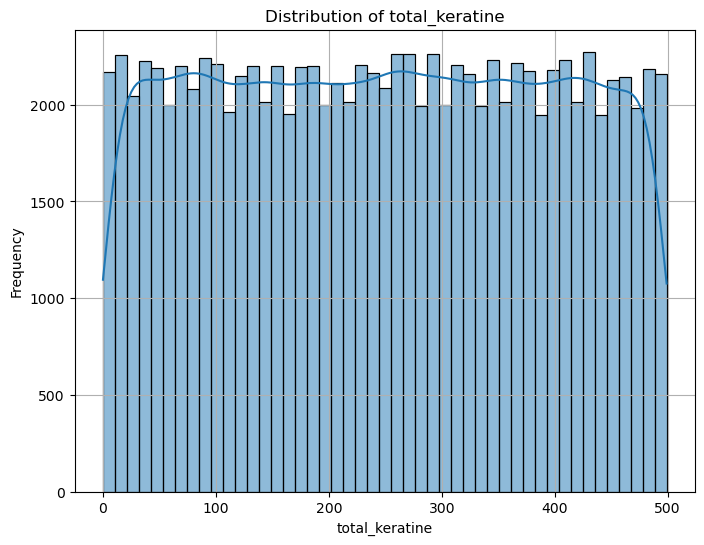

C:\Users\Lenovo X220 i7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo X220 i7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


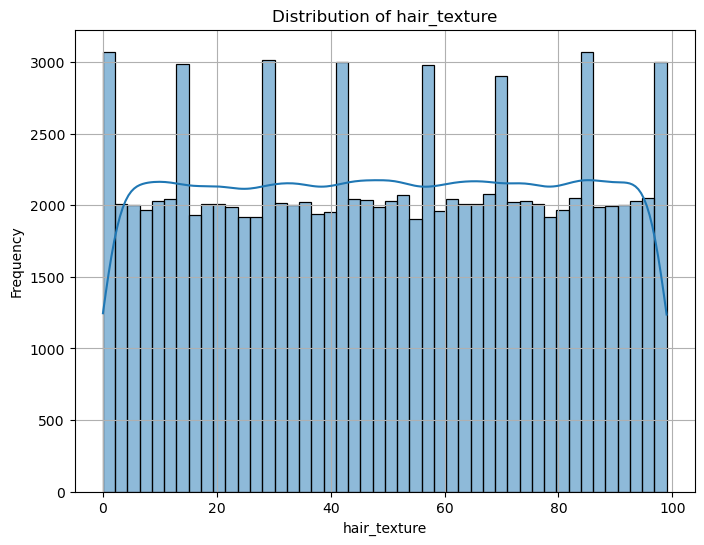

C:\Users\Lenovo X220 i7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo X220 i7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


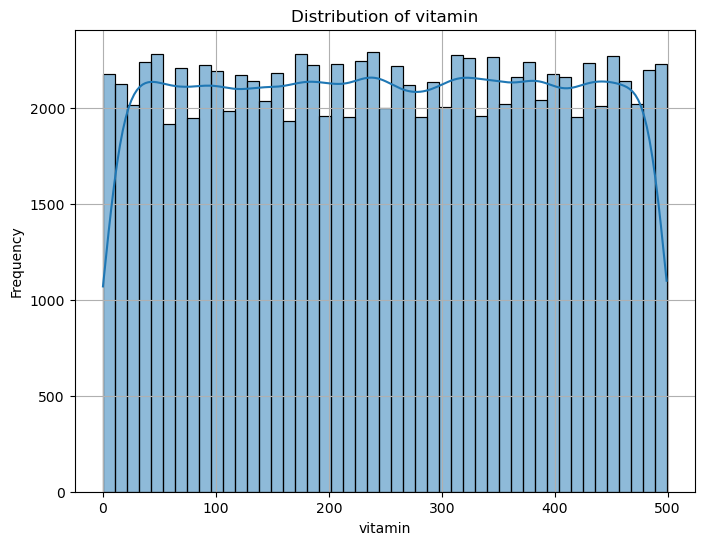

C:\Users\Lenovo X220 i7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo X220 i7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


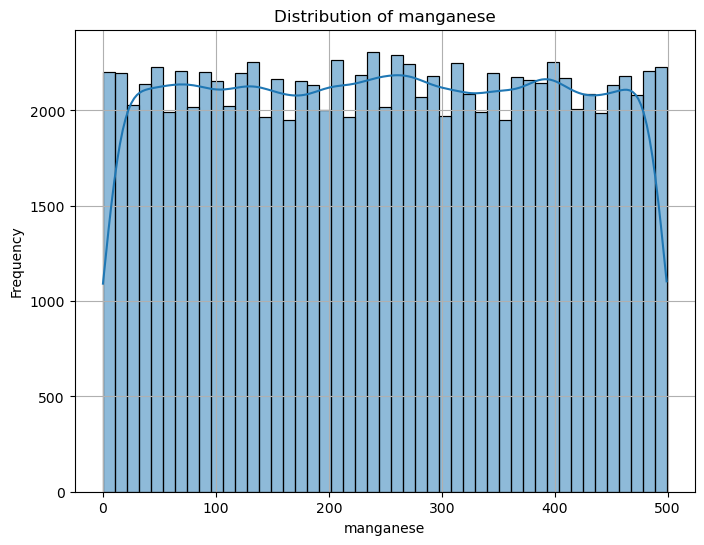

C:\Users\Lenovo X220 i7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo X220 i7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


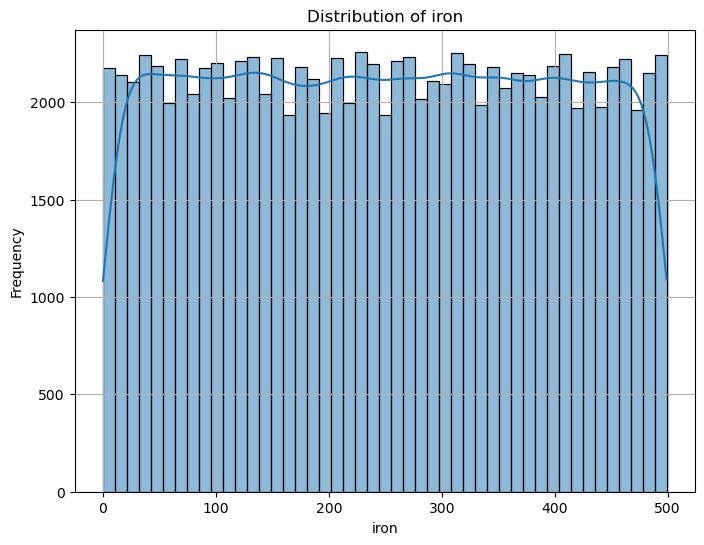

C:\Users\Lenovo X220 i7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo X220 i7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


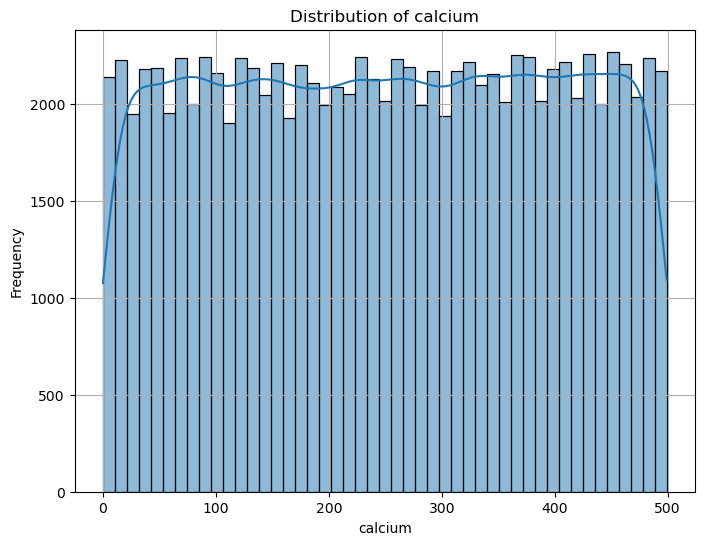

C:\Users\Lenovo X220 i7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo X220 i7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


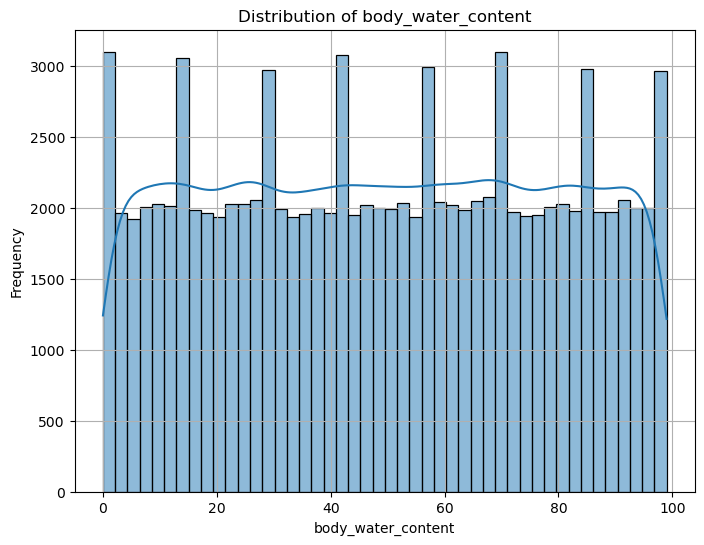

C:\Users\Lenovo X220 i7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo X220 i7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


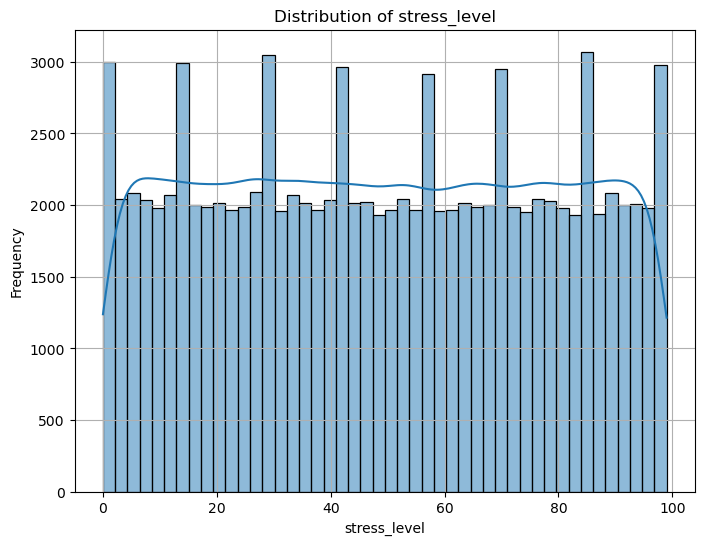

C:\Users\Lenovo X220 i7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo X220 i7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


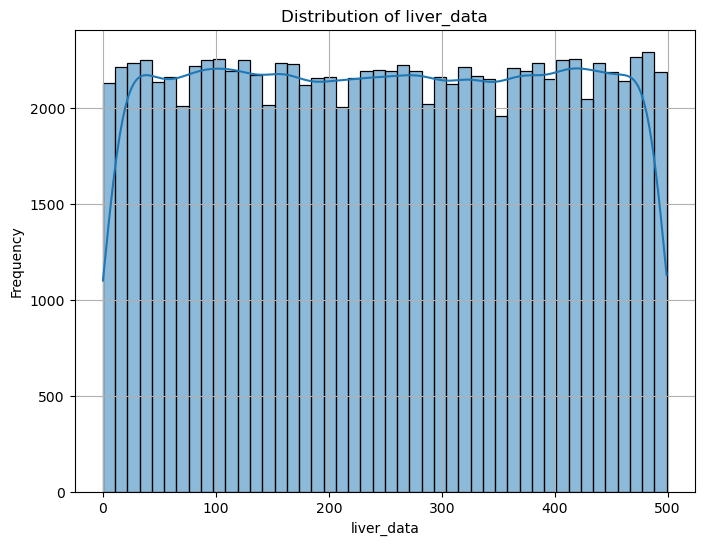

C:\Users\Lenovo X220 i7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo X220 i7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


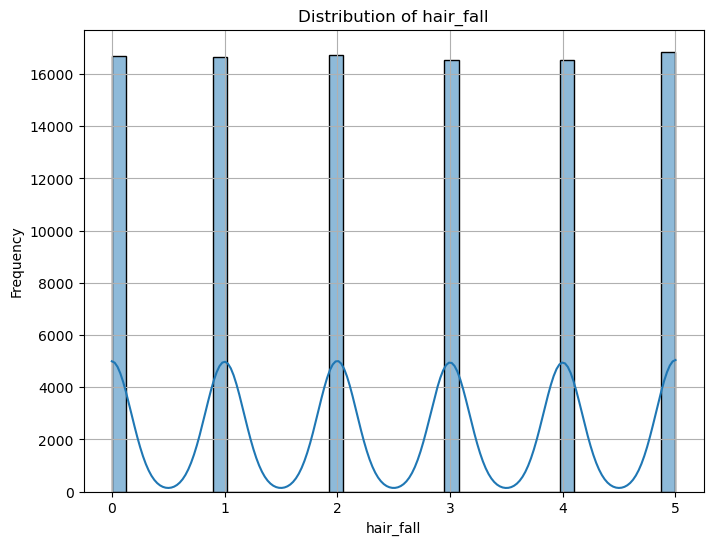

In [27]:
import seaborn as sns
numeric_df = df.select_dtypes(include=['number'])

# Plot histograms for each numerical column
for column in numeric_df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

#### Processing

In [28]:
target_column = 'hair_fall'  
# Splitting the DataFrame into X (features) and y (target)
X = df.drop(columns=[target_column])  # Drop the target column to get the features
y = df[target_column]  # Select only the target column

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (100000, 10)
Shape of y: (100000,)


In [29]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (80000, 10)
X_test shape: (20000, 10)
y_train shape: (80000,)
y_test shape: (20000,)


In [30]:
from sklearn.preprocessing import StandardScaler

numeric_cols = X_train.select_dtypes(include=['number']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on X_train and transform both X_train and X_test
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

### Model Validation 

In [31]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model using the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [32]:
# Scale the test data using the previously fitted scaler
X_test_scaled = X_test.copy()  # Make a copy of the test data
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define your trained models here (replace these placeholders with your actual trained models)
model_1 = LinearRegression()  # Replace with your first model
model_2 = RandomForestRegressor()  # Replace with RandomForestRegressor
model_3 = GradientBoostingRegressor()  # Replace with GradientBoostingRegressor

# Define a list of models
models = [model_1, model_2, model_3]

# Define a list to store the metric scores
mse_scores = []
r2_scores = []
mae_scores = []

# Evaluate each model using cross-validation
for model in models:
    # Perform cross-validation
    mse = -cross_val_score(model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
    r2 = cross_val_score(model, X_train_scaled, y_train, scoring='r2', cv=5)
    mae = -cross_val_score(model, X_train_scaled, y_train, scoring='neg_mean_absolute_error', cv=5)
    
    # Append mean scores to lists
    mse_scores.append(mse.mean())
    r2_scores.append(r2.mean())
    mae_scores.append(mae.mean())

for idx, model in enumerate(models):
    print(f"Model {idx + 1}:")
    print(f"MSE: {mse_scores[idx]}")
    print(f"R2: {r2_scores[idx]}")
    print(f"MAE: {mae_scores[idx]}\n")

Model 1:
MSE: 2.9257257016420892
R2: -0.00028787504448595235
MAE: 1.5022601318357642

Model 2:
MSE: 2.9772982187499997
R2: -0.01730916997982761
MAE: 1.5022029999999997

Model 3:
MSE: 2.9290053688089133
R2: -0.0013998141975183564
MAE: 1.5017035890694272



In [36]:
models = [
    LinearRegression(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

# Dictionary to store model results
model_results = {}

# Loop through models
for model in models:
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    
    # Store results in dictionary
    model_name = model.__class__.__name__
    model_results[model_name] = {'MSE': mse, 'R2': r2, 'MAE': mae}

results_df = pd.DataFrame.from_dict(model_results, orient='index')
print(results_df)

                                MSE        R2       MAE
LinearRegression           2.930730 -0.000122  1.504345
RandomForestRegressor      2.980753 -0.017192  1.504229
GradientBoostingRegressor  2.935222 -0.001655  1.504578


In [5]:
df.to_csv('hair_loss_data.csv', index=False)